## Hand-written digit classification using nearest subspace  
2017-10-20 Jeff Fessler, University of Michigan  
2018-10-09 Julia 1.0.1 with Steven Whitaker

### Overview
This notebook illustrates how to classify handwritten digits
using a nearest-subspace approach.
We focus initially on just a pair of digits,
although later you will generalize to all digits.

In [15]:
# packages needed
using Plots
using LinearAlgebra # svd, norm, etc.
using Statistics: mean

### Task 0: load the data and look at it  
This time we are going to work with the 4 and 9 digits
because those are harder to separate.

In [16]:
# read the MNIST data file for 0 and 1 digits
# download from web if needed
file0 = "data4"
file1 = "data9"
if !isfile(file0)
    download("http://cis.jhu.edu/~sachin/digit/" * file0, file0)
end
if !isfile(file1)
    download("http://cis.jhu.edu/~sachin/digit/" * file1, file1)
end

nx = 28 # original image size
ny = 28
nrep = 1000

d0 = Array{UInt8}(undef, (nx,ny,nrep))
read!(file0, d0) # load images of 0 digits

d1 = Array{UInt8}(undef, (nx,ny,nrep))
read!(file1, d1) # load images of 1 digits

iy = 2:ny
d0 = d0[:,iy,:] # Make images non-square to help debug
d1 = d1[:,iy,:]
ny = length(iy)

# Convert images to Float32 to avoid overflow errors
d0 = Array{Float32}(d0)
d1 = Array{Float32}(d1)

@show size(d0);

size(d0) = (28, 27, 1000)


In [17]:
# function to display mosaic of multiple images
function imshow3(x)
    tmp = permutedims(x, [1, 3, 2])
    tmp = reshape(tmp, :, ny)
    return heatmap(1:size(tmp,1), 1:ny, tmp,
        xtick=[1,nx], ytick=[1,ny], yflip=true,
        color=:grays, transpose=true, aspect_ratio=1)
end

imshow3 (generic function with 1 method)

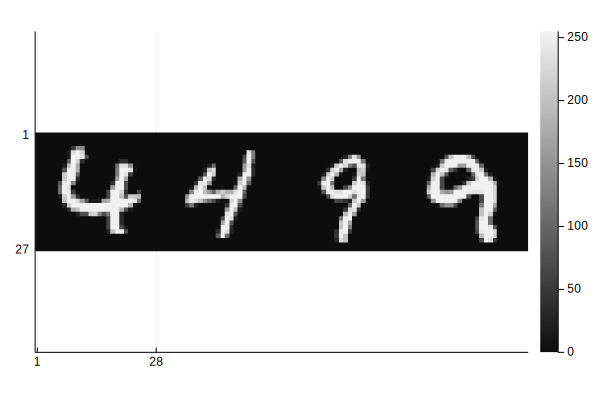

In [18]:
# look at a couple of the images
imshow3(cat(dims=3, d0[:,:,44:45], d1[:,:,654:655]))

In [19]:
# use some data for training, and some for test
ntrain = 100
ntest = nrep - ntrain
train0 = d0[:,:,1:ntrain] # training data
train1 = d1[:,:,1:ntrain]
test0 = d0[:,:,(ntrain+1):end] # testing data
test1 = d1[:,:,(ntrain+1):end];

size(mean0) = (28, 27, 1)


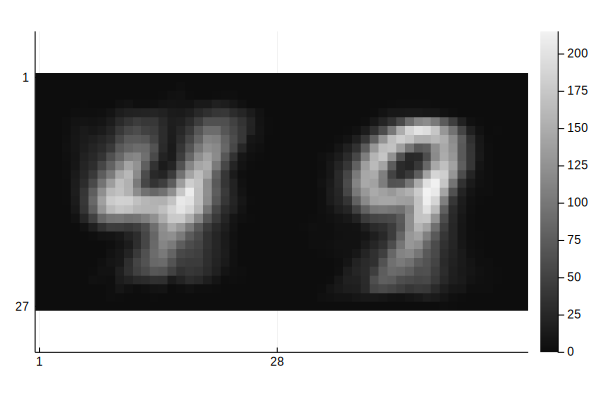

In [20]:
# look at mean image from each class just to get a sense of things
mean0 = mean(train0, dims=3) # makes a 3D array 28x27x1
mean1 = mean(train1, dims=3)
@show size(mean0)
imshow3(cat(dims=3, mean0, mean1))

### Task 1: Plot singular values for both digits' training data on the same graph  
Hint: you probably will need a ```reshape``` here.  
The horizontal axis should go from 1 to ```ntrain```.  
Include the plot in your report.

756×100 Array{Float32,2}:
  3.5111e-8    2.5936e-8    -4.16843e-9   …   1.42114e-7   1.40441e-7
  1.05674e-8   4.9054e-10    3.13378e-9       1.04841e-7   6.22031e-8
  1.54629e-8   6.1606e-9    -1.76872e-8       1.23334e-7  -2.02836e-7
 -9.57546e-9   5.86564e-9    2.0709e-8        6.96761e-8   1.16911e-7
 -3.72989e-9  -6.37901e-9   -2.54136e-9      -2.70064e-8  -4.97744e-8
 -5.53599e-9   1.20704e-9   -2.92437e-9   …  -4.68981e-8   1.04698e-7
 -1.31511e-8  -1.35406e-8   -1.96959e-8      -3.12555e-8   8.04695e-8
  3.96327e-9  -4.07517e-9   -3.57669e-8       5.07929e-8   1.21747e-7
 -4.31489e-9  -4.05709e-9   -6.99935e-10     -4.34651e-9  -7.9959e-8 
  2.72386e-9  -3.10952e-9    1.08777e-8       1.16957e-7   5.16843e-8
 -2.98753e-9  -4.08899e-9    1.26952e-8   …  -2.36861e-8   9.0585e-9 
  2.17816e-9  -7.786e-9      6.06226e-9       9.91281e-8  -4.1444e-8 
 -3.73018e-9   2.83187e-10   1.14773e-9      -8.14364e-8   3.76564e-9
  ⋮                                       ⋱                     

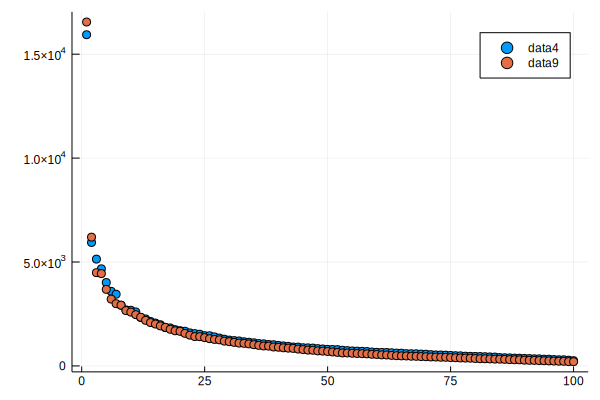

In [51]:
# student template
# name your left singular vectors u0 and u1 and your singular values s0 and s1
# so that subsequent plot commands will work
#A=zeros(756, ntrain)
#B=zeros(756, ntrain)

#for i=1:100
A = reshape(train0,(:,ntrain))
B = reshape(train1,(:,ntrain))
#end

u0, s0, _ = svd(A)
u1, s1, _ = svd(B)
display(u0)

# Plot the singular values for both digit's training data on the same graph
# This is called a "scree plot" - it can be helpful for choosing a dimension/rank.
# uncomment these:
plot(1:ntrain, s0, line=(:dots, :blue), label=file0)
plot!(1:ntrain, s1, line=(:dots, :red), label=file1)

### Task 2: Display the first three left singular vectors of the training data for each digit 
These are essentially the "principle components" in principle component analysis (PCA).  
Each singular vector is a vector of length 28\*27 so you definitely will need to use ```reshape``` to display these singular vectors as 2D images.  
Your 3 subspace basis vectors
should "look sensible"
in light of typical hand-written digit variations.
If they do not make sense to you,
then ask for help before proceeding.  

Include the two images of your three left singular vectors in your report.

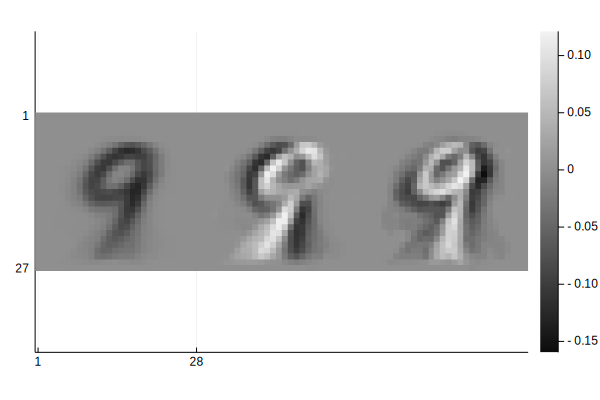

In [52]:
u0_new = reshape(u0,28,27,ntrain)
u1_new = reshape(u1,28,27,ntrain)
#for i = 1:3
imshow3(cat(dims=3, u1_new[:,:,1:3]))
#imshow3(cat(dims=3, u1_new[:,:,1:3]))
#end
    
#imshow3(cat(dims=3,u0_new, u1_new))

### Task 3: Explore how well the first left singular vectors separate the two classes  
Here we regress each of the training digits onto the first left singular vectors of the two classes, and then make a scatter plot to see how well separated they are.  
By "regress" we mean solve a linear LS problem of the form
argmin$_{x \in R}$ || data - U[:,1] x ||.  
You should see two clouds of points that are somewhat separated, but not perfectly so.  
Include this plot in your report.

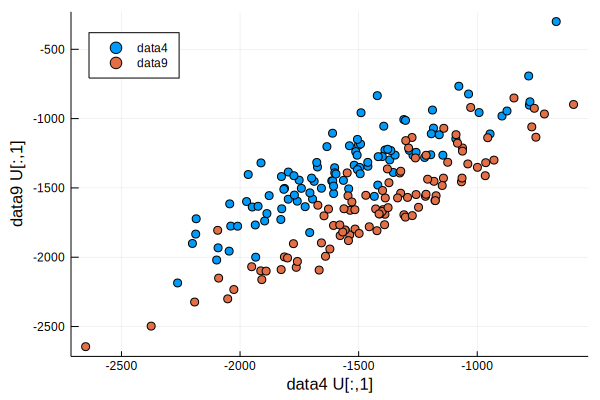

In [53]:
# this cell assumes your left singular vectors are named "u0" and "u1"
# think about why there is a u' below and what is the purpose of the two [:] operations
regress = (data, u) -> mapslices(slice -> u'*slice[:], data, dims=(1,2))[:]
scatter(regress(train0, u0[:,1]), regress(train0, u1[:,1]), label=file0)
scatter!(regress(train1, u0[:,1]), regress(train1, u1[:,1]), label=file1)
plot!(xlabel = file0 * " U[:,1]", ylabel = file1 * " U[:,1]", legend=:topleft)

### Task 4: Classification based on nearest subspace  
This is the core of this project.  
You are going to take each test digit and project it onto the subspaces
defined by the first *three* left singular vectors
of each of the two digit's training data.
We will see in a later chapter why using a few of the left singular vectors is a reasonable choice of basis for a subspace in such applications.  
You will compute the distance of each test digit to those subspaces
and you will classify each digit by choosing the subspace that is closest.
Recall that if $Q_0$ is a matrix with orthonormal columns,
then the projection of a vector $y$ onto the subspace
Range($Q_0$) is simply
$\hat{y} = Q_0*Q_0'*y$,
and the distance between $y$ and that point is $|| \hat{y} - y ||$.   
Count how many of the test digits are classified correctly
and report the classification accuracy
for the 4's and the 9's in your report.  
Hint.  The accuracies are roughly 80% and 90% (rounded to the nearest multiple of 10).  

Hint.  ```reshape``` and ```norm``` and ```mapslices``` are all useful here.

In [56]:
# this can be done in about 10 lines of code using mapslices, but it is ok to use a loop too.

y_test0=zeros(756,ntest)
for i = 1:ntest
    y_test0[:,i] = vec(test0[:,:,i]) #756x900
end

Q0 = u0[:,1:3] #756x3
Q1 = u1[:,1:3] #756x3

y_cap_0 = Q0 * Q0' * y_test0 #756x3 3x756 756x900 => 756x900
y_cap_1 = Q1 * Q1' * y_test0 #756x3 3x756 756x900 => 756x900
dist0 = norm.(y_cap_0 - y_test0) #756x900
dist1 = norm.(y_cap_1 - y_test0) #756x900

correct0 = zeros(ntest)
for j = 1:ntest
    if(dist0[:,j] < dist1[:,j])
        correct0[j] = 1
    else
        correct0[j] = 0
    end
end

y_test1 = zeros(756,ntest)
for i = 1:ntest
    y_test1[:,i] = vec(test1[:,:,i]) #756x900
end

y_cap_00 = Q0 * Q0' * y_test1 #756x3 3x756 756x900 => 756x900
y_cap_11 = Q1 * Q1' * y_test1 #756x3 3x756 756x900 => 756x900
dist0 = norm.(y_cap_00 - y_test1) #756x900
dist1 = norm.(y_cap_11 - y_test1) #756x900

correct1 = zeros(ntest)
for j = 1:ntest
    if(dist0[:,j] < dist1[:,j])
        correct1[j] = 1
    else
        correct1[j] = 0
    end
end

# probably you will use command something like this at the end:
 @show sum(correct0)*100 / ntest
 @show sum(correct1)*100 / ntest

(sum(correct0) * 100) / ntest = 88.55555555555556
(sum(correct1) * 100) / ntest = 97.88888888888889


97.88888888888889

### Task 5: Find all the misclassified digits and display a couple of them  
The ``findall`` function is probably useful here.  
Report the number of 4's and 9's that are incorrectly classified.  
Show pictures of the first two 4's and 9's that are misclassified in your report.

length(bad0) = 103
length(bad1) = 19


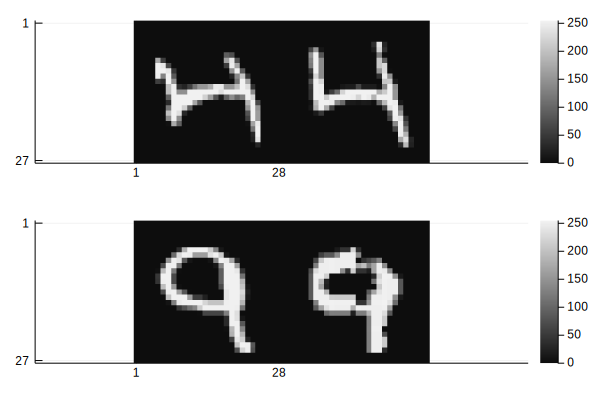

In [57]:
bad0 = findall(correct0 .== false)
bad1 = findall(correct1 .== false)
@show length(bad0)
@show length(bad1)
p0 = imshow3(test0[:,:,bad0[1:2]])
p1 = imshow3(test1[:,:,bad1[1:2]])
plot(p0,p1, layout=(2,1))

### Optional Tasks   
* Go back to the previous classifiers (nearest angle and LS with hand-crafted features) for the "4" and "9" digits and compare the classification accuracies of those methods with this nearest subspace method.

* Try other subspace dimensions instead of just 3 to see if you can improve accuracy by using fewer or more left singular vectors.

* Generalize to nearest-subspace classification of all 10 digits.
This is fairly easy to do and we'll probably have the whole class do it
in a future discussion section.  The key to making it efficient is to use a 4D array of data of size [28,27,ntest,10] instead of separate variables data0, data1, data2, ... like we have used in this notebook.

* Use this web tool to capture your own "hand-written" digit:
[http://web.eecs.umich.edu/~fessler/course/551/r/digitdraw.htm]
and save it as a JPG file.
(On my Mac this worked for Safari
but not on Chrome,
so try another browser
if your first try fails, or use a screen capture to get the digit.)
Read that image into Julia
(or Matlab)
and down-size it to be the appropriate size
for your digit classifier.
Apply your classifier
and see if it identifies the correct digit.
If it works,
then you have a good classifier
and probably
better hand writing than your 551 professor.